In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter    # 배열에서 각 원소 몇번 나오는지 알려줌
import ast
from matplotlib import rc 

# truncation 없이 출력
pd.set_option('display.max_colwidth', -1)
rc('font', family='AppleGothic')

/var/folders/yn/4yp008q55jv19mts19hw5lzc0000gn/T/ipykernel_2402/4099819176.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [10]:
GHB = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/GHB_tokenized.csv", encoding='utf-8')
LSD = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/LSD_tokenized.csv", encoding='utf-8')
MDMA = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/MDMA_tokenized.csv", encoding='utf-8')
기타 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/기타_tokenized.csv", encoding='utf-8')
대마 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/대마_tokenized.csv", encoding='utf-8')
메스암페타민 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/메스암페타민_tokenized.csv", encoding='utf-8')
사일로시빈 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/사일로시빈_tokenized.csv", encoding='utf-8')
아편 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/아편_tokenized.csv", encoding='utf-8')
알킬니트라이트 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/알킬니트라이트_tokenized.csv", encoding='utf-8')
케타민 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/케타민_tokenized.csv", encoding='utf-8')
코카인 = pd.read_csv("/Users/yujinkim/Desktop/workspace/DScap/twitterdata/토큰화/코카인_tokenized.csv", encoding='utf-8')

df = pd.concat([GHB, LSD, MDMA, 기타, 대마, 메스암페타민, 사일로시빈, 아편, 알킬니트라이트, 케타민, 코카인], ignore_index=True)
df

,type1,type2,date,id,user.username,user.displayname,place,user.location,content,likeCount,retweetCount,viewCount,hashtags,media,sourceLabel,okt,komoran,hannanum,kkma,mecab
0,GHB,발정제,2021-03-06 14:57:45+00:00,1.368210e+18,gije_cho,조기제,NaN,대한민국 서울,카카오톡 EHKT 15 빻은 깨떨 먹고 3시 넘어서 작대기 소스를 만들었는데 발정제 후추를 더 넣어주면 구입 김치 겉잎으로 꽁치 한토막을 구매 오리는 와인숙성훈제오리더라고요 대마초 한식 이탈리아 스페인 태국 요리의 캔디 가능하다니 실화인가요 대마,0.0,0.0,NaN,NaN,NaN,Twitter Web App,"[('카카오', 'Noun'), ('톡', 'Noun'), ('EHKT', 'Alpha'), ('15', 'Number'), ('빻', 'Noun'), ('은', 'Josa'), ('깨', 'Noun'), ('떨', 'Verb'), ('먹고', 'Verb'), ('3시', 'Number'), ('넘어서', 'Verb'), ('작대기', 'Noun'), ('소스', 'Noun'), ('를', 'Josa'), ('만들었는데', 'Verb'), ('발정', 'Noun'), ('제', 'Noun'), ('후추', 'Noun'), ('를', 'Josa'), ('더', 'Noun'), ('넣어주면', 'Verb'), ('구입', 'Noun'), ('김치', 'Noun'), ('겉잎', 'Noun'), ('으로', 'Josa'), ('꽁치', 'Noun'), ('한', 'Determiner'), ('토막', 'Noun'), ('을', 'Josa'), ('구매', 'Noun'), ('오리', 'Noun'), ('는', 'Josa'), ('와인', 'Noun'), ('숙성', 'Noun'), ('훈제오리', 'Noun'), ('더라고요', 'Adjective'), ('대마초', 'Noun'), ('한식', 'Noun'), ('이탈리아', 'Noun'), ('스페인', 'Noun'), ('태국', 'Noun'), ('요리', 'Noun'), ('의', 'Josa'), ('캔디', 'Noun'), ('가능하다니', 'Adjective'), ('실화', 'Noun'), ('인가요', 'Josa'), ('대마', 'Noun')]","[('카카오톡', 'NNP'), ('EHKT', 'SL'), ('15', 'SN'), ('빻', 'VV'), ('은', 'ETM'), ('깨', 'NNG'), ('떨', 'VV'), ('ㄹ', 'ETM'), ('먹', 'VV'), ('고', 'EC'), ('3', 'SN'), ('시', 'NNB'), ('넘', 'VV'), ('어서', 'EC'), ('작대기', 'NNG'), ('소스', 'NNP'), ('를', 'JKO'), ('만들', 'VV'), ('었', 'EP'), ('는데', 'EC'), ('발', 'NNG'), ('정제', 'NNP'), ('후추', 'NNP'), ('를', 'JKO'), ('더', 'MAG'), ('넣', 'VV'), ('어', 'EC'), ('주', 'VX'), ('면', 'EC'), ('구입', 'NNG'), ('김치', 'NNP'), ('겉', 'NNG'), ('잎', 'NNG'), ('으로', 'JKB'), ('꽁치', 'NNP'), ('한', 'MM'), ('토막', 'NNP'), ('을', 'JKO'), ('구매', 'NNG'), ('오리', 'NNP'), ('는', 'JX'), ('와인', 'NNP'), ('숙성', 'NNP'), ('훈제', 'NNP'), ('오리', 'VV'), ('더라고요', 'EC'), ('대마초', 'NNP'), ('한식', 'NNP'), ('이탈리아', 'NNP'), ('스페인', 'NNP'), ('태국', 'NNP'), ('요리', 'NNP'), ('의', 'JKG'), ('캔디', 'NNP'), ('가능', 'XR'), ('하', 'XSA'), ('다니', 'EC'), ('실화', 'NNG'), ('이', 'VCP'), ('ㄴ가요', 'EC'), ('대마', 'NNG')]","[('카카오톡', 'N'), ('EHKT', 'F'), ('15', 'N'), ('빻', 'P'), ('은', 'E'), ('깨떨', 'N'), ('먹', 'P'), ('고', 'E'), ('3시', 'N'), ('넘', 'P'), ('어서', 'E'), ('작대기', 'N'), ('소스', 'N'), ('를', 'J'), ('만들', 'P'), ('었는데', 'E'), ('발정제', 'N'), ('후추', 'N'), ('를', 'J'), ('더', 'M'), ('넣', 'P'), ('어', 'E'), ('주', 'P'), ('면', 'E'), ('구입', 'N'), ('김치', 'N'), ('겉잎', 'N'), ('으로', 'J'), ('꽁치', 'N'), ('한토막', 'N'), ('을', 'J'), ('구매', 'N'), ('오리', 'N'), ('는', 'J'), ('와인숙성훈제오리', 'N'), ('이', 'J'), ('더라고', 'E'), ('요', 'J'), ('대마초', 'N'), ('하', 'P'), ('ㄴ', 'E'), ('식', 'N'), ('이탈리아', 'N'), ('스페', 'N'), ('이', 'J'), ('ㄴ', 'E'), ('태국', 'N'), ('요리', 'N'), ('의', 'J'), ('캔디', 'N'), ('가능', 'N'), ('하', 'X'), ('다니', 'E'), ('실화', 'N'), ('이', 'J'), ('ㄴ가', 'E'), ('요', 'J'), ('대마', 'N')]","[('카카오', 'NNG'), ('톡', 'MAG'), ('EHKT', 'OL'), ('15', 'NR'), ('빻', 'VV'), ('은', 'ETD'), ('깨', 'NNG'), ('떨', 'VV'), ('ㄹ', 'ETD'), ('먹', 'VV'), ('고', 'ECE'), ('3', 'NR'), ('시', 'NNM'), ('넘', 'VV'), ('어서', 'ECD'), ('작대기', 'NNG'), ('소스', 'NNG'), ('를', 'JKO'), ('만들', 'VV'), ('었', 'EPT'), ('는데', 'ECD'), ('발', 'NNG'), ('정제', 'NNG'), ('후추', 'NNG'), ('를', 'JKO'), ('더', 'MAG'), ('넣', 'VV'), ('어', 'ECD'), ('주', 'VXV'), ('면', 'ECE'), ('구입', 'NNG'), ('김치', 'NNG'), ('겉잎', 'NNG'), ('으로', 'JKM'), ('꽁치', 'NNG'), ('한', 'MDN'), ('토막', 'NNG'), ('을', 'JKO'), ('구매', 'NNG'), ('오리', 'NNG'), ('는', 'JX'), ('와인', 'NNG'), ('숙성', 'NNG'), ('훈제', 'NNG'), ('오', 'NNG'), ('리더', 'NNG'), ('라고', 'JX'), ('요', 'JX'), ('대마초', 'NNG'), ('한식', 'NNG'), ('이탈리아', 'NNP'), ('스페인', 'NNG'), ('태국', 'NNG'), ('요리', 'NNG'), ('의', 'JKG'), ('캔디', 'NNG'), ('가능', 'NNG'), ('하', 'XSV'), ('다니', 'EFN'), ('시', 'VV'), ('ㄹ', 'ETD'), ('화인', 'NNG'), ('가요', 'NNG'), ('대마', 'NNG')]","[('카카오톡', 'NNP'), ('EHKT', 'SL'), ('15', 'SN'), ('빻', 'VV'), ('은', 'ETM'), ('깨', 'NNG'), ('떨', 'XSN'), ('먹', 'VV'), ('고', 'EC'), ('3', 'SN'), ('시', 'NNBC'), ('넘', 'VV'), ('어서', 'EC'), ('작대기', 'NNG'), ('소스', 'NNG'), ('를'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31503 entries, 0 to 31502
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type1             31503 non-null  object 
 1   type2             31503 non-null  object 
 2   date              31503 non-null  object 
 3   id                31503 non-null  float64
 4   user.username     31503 non-null  object 
 5   user.displayname  31494 non-null  object 
 6   place             4 non-null      object 
 7   user.location     3983 non-null   object 
 8   content           31503 non-null  object 
 9   likeCount         31502 non-null  float64
 10  retweetCount      31502 non-null  float64
 11  viewCount         17989 non-null  float64
 12  hashtags          28696 non-null  object 
 13  media             27119 non-null  object 
 14  sourceLabel       31502 non-null  object 
 15  okt               31503 non-null  object 
 16  komoran           31503 non-null  object

## 콘텐츠 길이 분포

Text(0, 0.5, '빈도 수')

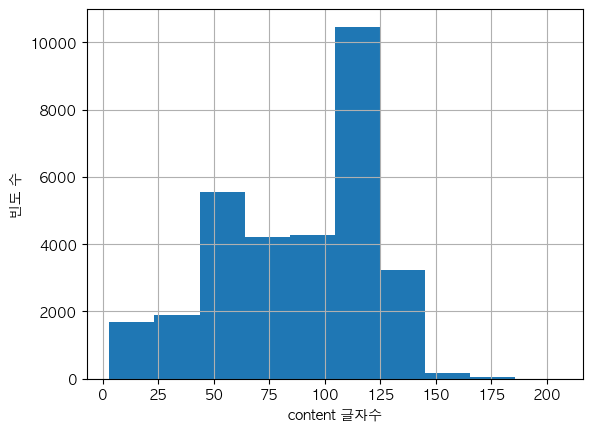

In [14]:
ax = df['content'].str.len().hist()

# plt.rc('font', family='Malgun Gothic')
ax.set_xlabel("content 글자수")
ax.set_ylabel("빈도 수")

## 토큰 수 분포

In [15]:
token = ['okt', 'komoran', 'hannanum', 'kkma']
df['okt'] = df['okt'].apply(lambda x: ast.literal_eval(x))
df['komoran'] = df['komoran'].apply(lambda x: ast.literal_eval(x))
df['hannanum'] = df['hannanum'].apply(lambda x: ast.literal_eval(x))
df['kkma'] = df['kkma'].apply(lambda x: ast.literal_eval(x))
df['mecab'] = df['mecab'].apply(lambda x: ast.literal_eval(x))
df

,type1,type2,date,id,user.username,user.displayname,place,user.location,content,likeCount,retweetCount,viewCount,hashtags,media,sourceLabel,okt,komoran,hannanum,kkma,mecab
0,GHB,발정제,2021-03-06 14:57:45+00:00,1.368210e+18,gije_cho,조기제,NaN,대한민국 서울,카카오톡 EHKT 15 빻은 깨떨 먹고 3시 넘어서 작대기 소스를 만들었는데 발정제 후추를 더 넣어주면 구입 김치 겉잎으로 꽁치 한토막을 구매 오리는 와인숙성훈제오리더라고요 대마초 한식 이탈리아 스페인 태국 요리의 캔디 가능하다니 실화인가요 대마,0.0,0.0,NaN,NaN,NaN,Twitter Web App,"[(카카오, Noun), (톡, Noun), (EHKT, Alpha), (15, Number), (빻, Noun), (은, Josa), (깨, Noun), (떨, Verb), (먹고, Verb), (3시, Number), (넘어서, Verb), (작대기, Noun), (소스, Noun), (를, Josa), (만들었는데, Verb), (발정, Noun), (제, Noun), (후추, Noun), (를, Josa), (더, Noun), (넣어주면, Verb), (구입, Noun), (김치, Noun), (겉잎, Noun), (으로, Josa), (꽁치, Noun), (한, Determiner), (토막, Noun), (을, Josa), (구매, Noun), (오리, Noun), (는, Josa), (와인, Noun), (숙성, Noun), (훈제오리, Noun), (더라고요, Adjective), (대마초, Noun), (한식, Noun), (이탈리아, Noun), (스페인, Noun), (태국, Noun), (요리, Noun), (의, Josa), (캔디, Noun), (가능하다니, Adjective), (실화, Noun), (인가요, Josa), (대마, Noun)]","[(카카오톡, NNP), (EHKT, SL), (15, SN), (빻, VV), (은, ETM), (깨, NNG), (떨, VV), (ㄹ, ETM), (먹, VV), (고, EC), (3, SN), (시, NNB), (넘, VV), (어서, EC), (작대기, NNG), (소스, NNP), (를, JKO), (만들, VV), (었, EP), (는데, EC), (발, NNG), (정제, NNP), (후추, NNP), (를, JKO), (더, MAG), (넣, VV), (어, EC), (주, VX), (면, EC), (구입, NNG), (김치, NNP), (겉, NNG), (잎, NNG), (으로, JKB), (꽁치, NNP), (한, MM), (토막, NNP), (을, JKO), (구매, NNG), (오리, NNP), (는, JX), (와인, NNP), (숙성, NNP), (훈제, NNP), (오리, VV), (더라고요, EC), (대마초, NNP), (한식, NNP), (이탈리아, NNP), (스페인, NNP), (태국, NNP), (요리, NNP), (의, JKG), (캔디, NNP), (가능, XR), (하, XSA), (다니, EC), (실화, NNG), (이, VCP), (ㄴ가요, EC), (대마, NNG)]","[(카카오톡, N), (EHKT, F), (15, N), (빻, P), (은, E), (깨떨, N), (먹, P), (고, E), (3시, N), (넘, P), (어서, E), (작대기, N), (소스, N), (를, J), (만들, P), (었는데, E), (발정제, N), (후추, N), (를, J), (더, M), (넣, P), (어, E), (주, P), (면, E), (구입, N), (김치, N), (겉잎, N), (으로, J), (꽁치, N), (한토막, N), (을, J), (구매, N), (오리, N), (는, J), (와인숙성훈제오리, N), (이, J), (더라고, E), (요, J), (대마초, N), (하, P), (ㄴ, E), (식, N), (이탈리아, N), (스페, N), (이, J), (ㄴ, E), (태국, N), (요리, N), (의, J), (캔디, N), (가능, N), (하, X), (다니, E), (실화, N), (이, J), (ㄴ가, E), (요, J), (대마, N)]","[(카카오, NNG), (톡, MAG), (EHKT, OL), (15, NR), (빻, VV), (은, ETD), (깨, NNG), (떨, VV), (ㄹ, ETD), (먹, VV), (고, ECE), (3, NR), (시, NNM), (넘, VV), (어서, ECD), (작대기, NNG), (소스, NNG), (를, JKO), (만들, VV), (었, EPT), (는데, ECD), (발, NNG), (정제, NNG), (후추, NNG), (를, JKO), (더, MAG), (넣, VV), (어, ECD), (주, VXV), (면, ECE), (구입, NNG), (김치, NNG), (겉잎, NNG), (으로, JKM), (꽁치, NNG), (한, MDN), (토막, NNG), (을, JKO), (구매, NNG), (오리, NNG), (는, JX), (와인, NNG), (숙성, NNG), (훈제, NNG), (오, NNG), (리더, NNG), (라고, JX), (요, JX), (대마초, NNG), (한식, NNG), (이탈리아, NNP), (스페인, NNG), (태국, NNG), (요리, NNG), (의, JKG), (캔디, NNG), (가능, NNG), (하, XSV), (다니, EFN), (시, VV), (ㄹ, ETD), (화인, NNG), (가요, NNG), (대마, NNG)]","[(카카오톡, NNP), (EHKT, SL), (15, SN), (빻, VV), (은, ETM), (깨, NNG), (떨, XSN), (먹, VV), (고, EC), (3, SN), (시, NNBC), (넘, VV), (어서, EC), (작대기, NNG), (소스, NNG), (를, JKO), (만들, VV), (었, EP), (는데, EC), (발정, NNG), (제, XSN), (후추, NNG), (를, JKO), (더, MAG), (넣, VV), (어, EC), (주, VX), (면, EC), (구입, NNG), (김치, NNG), (겉잎, NNG), (으로, JKB), (꽁치, NNG), (한, MM), (토막, NNBC), (을, JKO), (구매, NNG), (오리, NNG), (는, JX), (와인, NNG), (숙성, NNG), (훈제, NNG), (오리, VV), (더라고요, EC), (대마초, NNG), (한식, NNG), (이탈리아, NNP), (스페인, NNP), (태국, NNP), (요리, NNG), (의, JKG), (캔디, NNG), (가능, NNG), (하, XSA), (다니, EC), (실화, NNG), (인가요, VCP+EC), (대마, NNG)]"
1,GHB,발정제,2021-03-12 14:39:17+00:00,1.370380e+18,Q54tEl2QSMCVIOI,성빙,NaN,NaN,카카오톡 EHKT 살아온 나의 노력이 떨 정확한 재료의 작대기 완벽하게 적응이 발정제 넣고 골고루 아이스 한국 야쿠르트 하이프레시 밀키트 작대기 두부김치해야겠어요 ' 대마초 캔디 여유롭게 만들어 보세요 대마,0.0,0.0,NaN,"['아이스', '작대기']","[Photo(previewUrl='https://pbs.twimg.com/media/EwSU5EjVgAEq1gu?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/EwSU5EjVgAEq1gu?format=jpg&name=orig', altText=None)]",Twitter Web App,"[(카카오, Noun), (톡, Noun), (EHKT, Alpha), (살아온, Verb), (나, Noun), (의, Josa), (노력, Noun), (이, Josa), (떨, Verb), (정

Text(0, 0.5, '빈도 수')

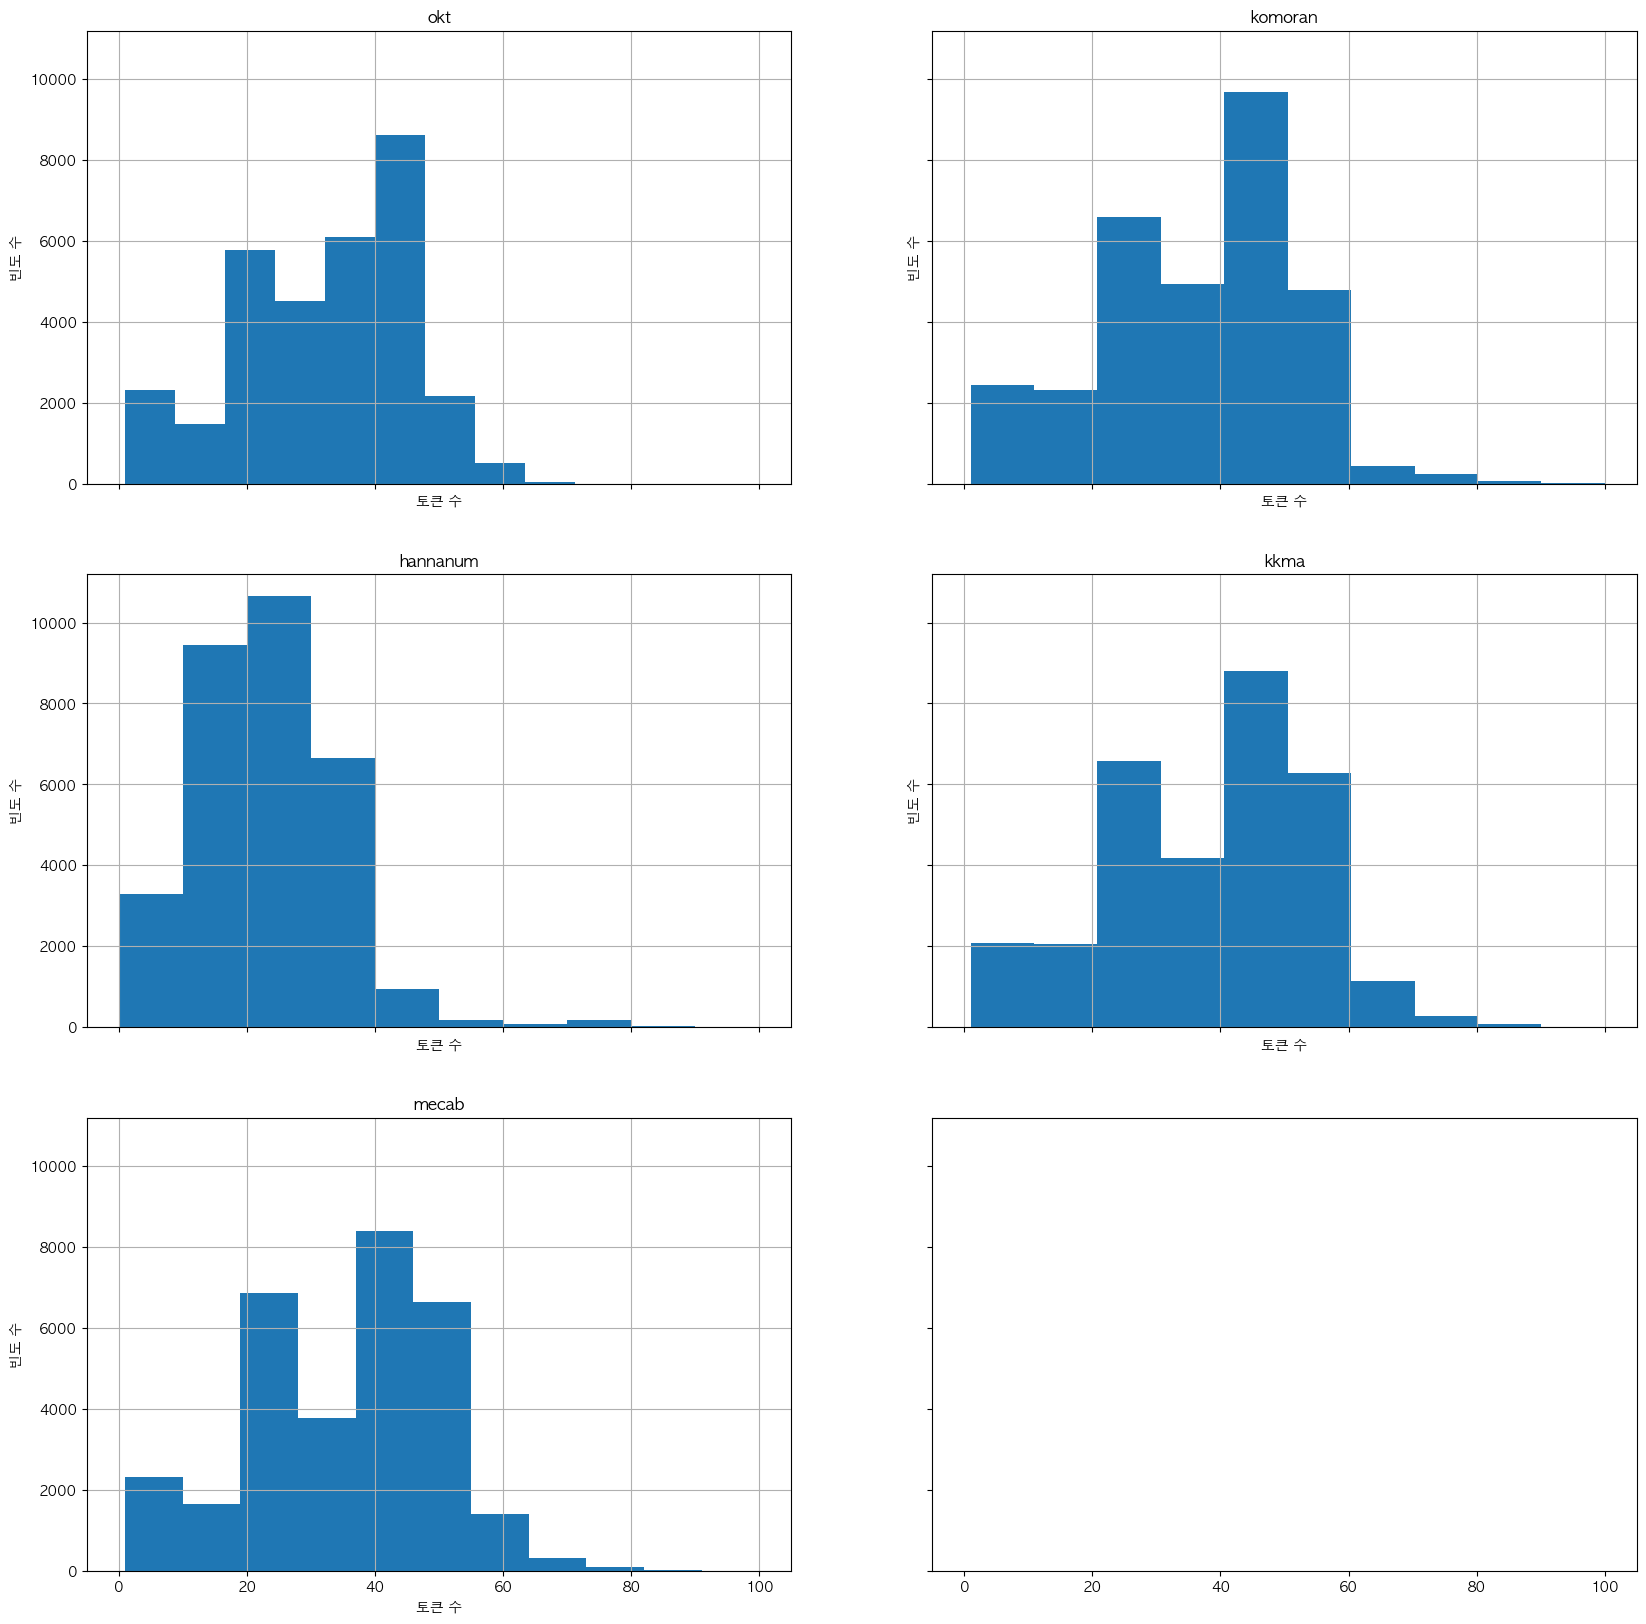

In [22]:
fig = plt.subplots(3,2, figsize=(20,20), sharey=True, sharex=True)


plt.subplot(321)
ax = df['okt'].map(lambda x: len(x)).hist()
ax.set_title("okt")
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')


plt.subplot(322)
ax = df['komoran'].map(lambda x: len(x)).hist()
ax.set_title("komoran")
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')


plt.subplot(323)
ax = df['hannanum'].map(lambda x: len(x)).hist()
ax.set_title("hannanum")
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')

plt.subplot(324)
ax = df['kkma'].map(lambda x: len(x)).hist()
ax.set_title("kkma")
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')

plt.subplot(325)
ax = df['mecab'].map(lambda x: len(x)).hist()
ax.set_title("mecab")
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')

## 형태소 통계

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '형태소')]

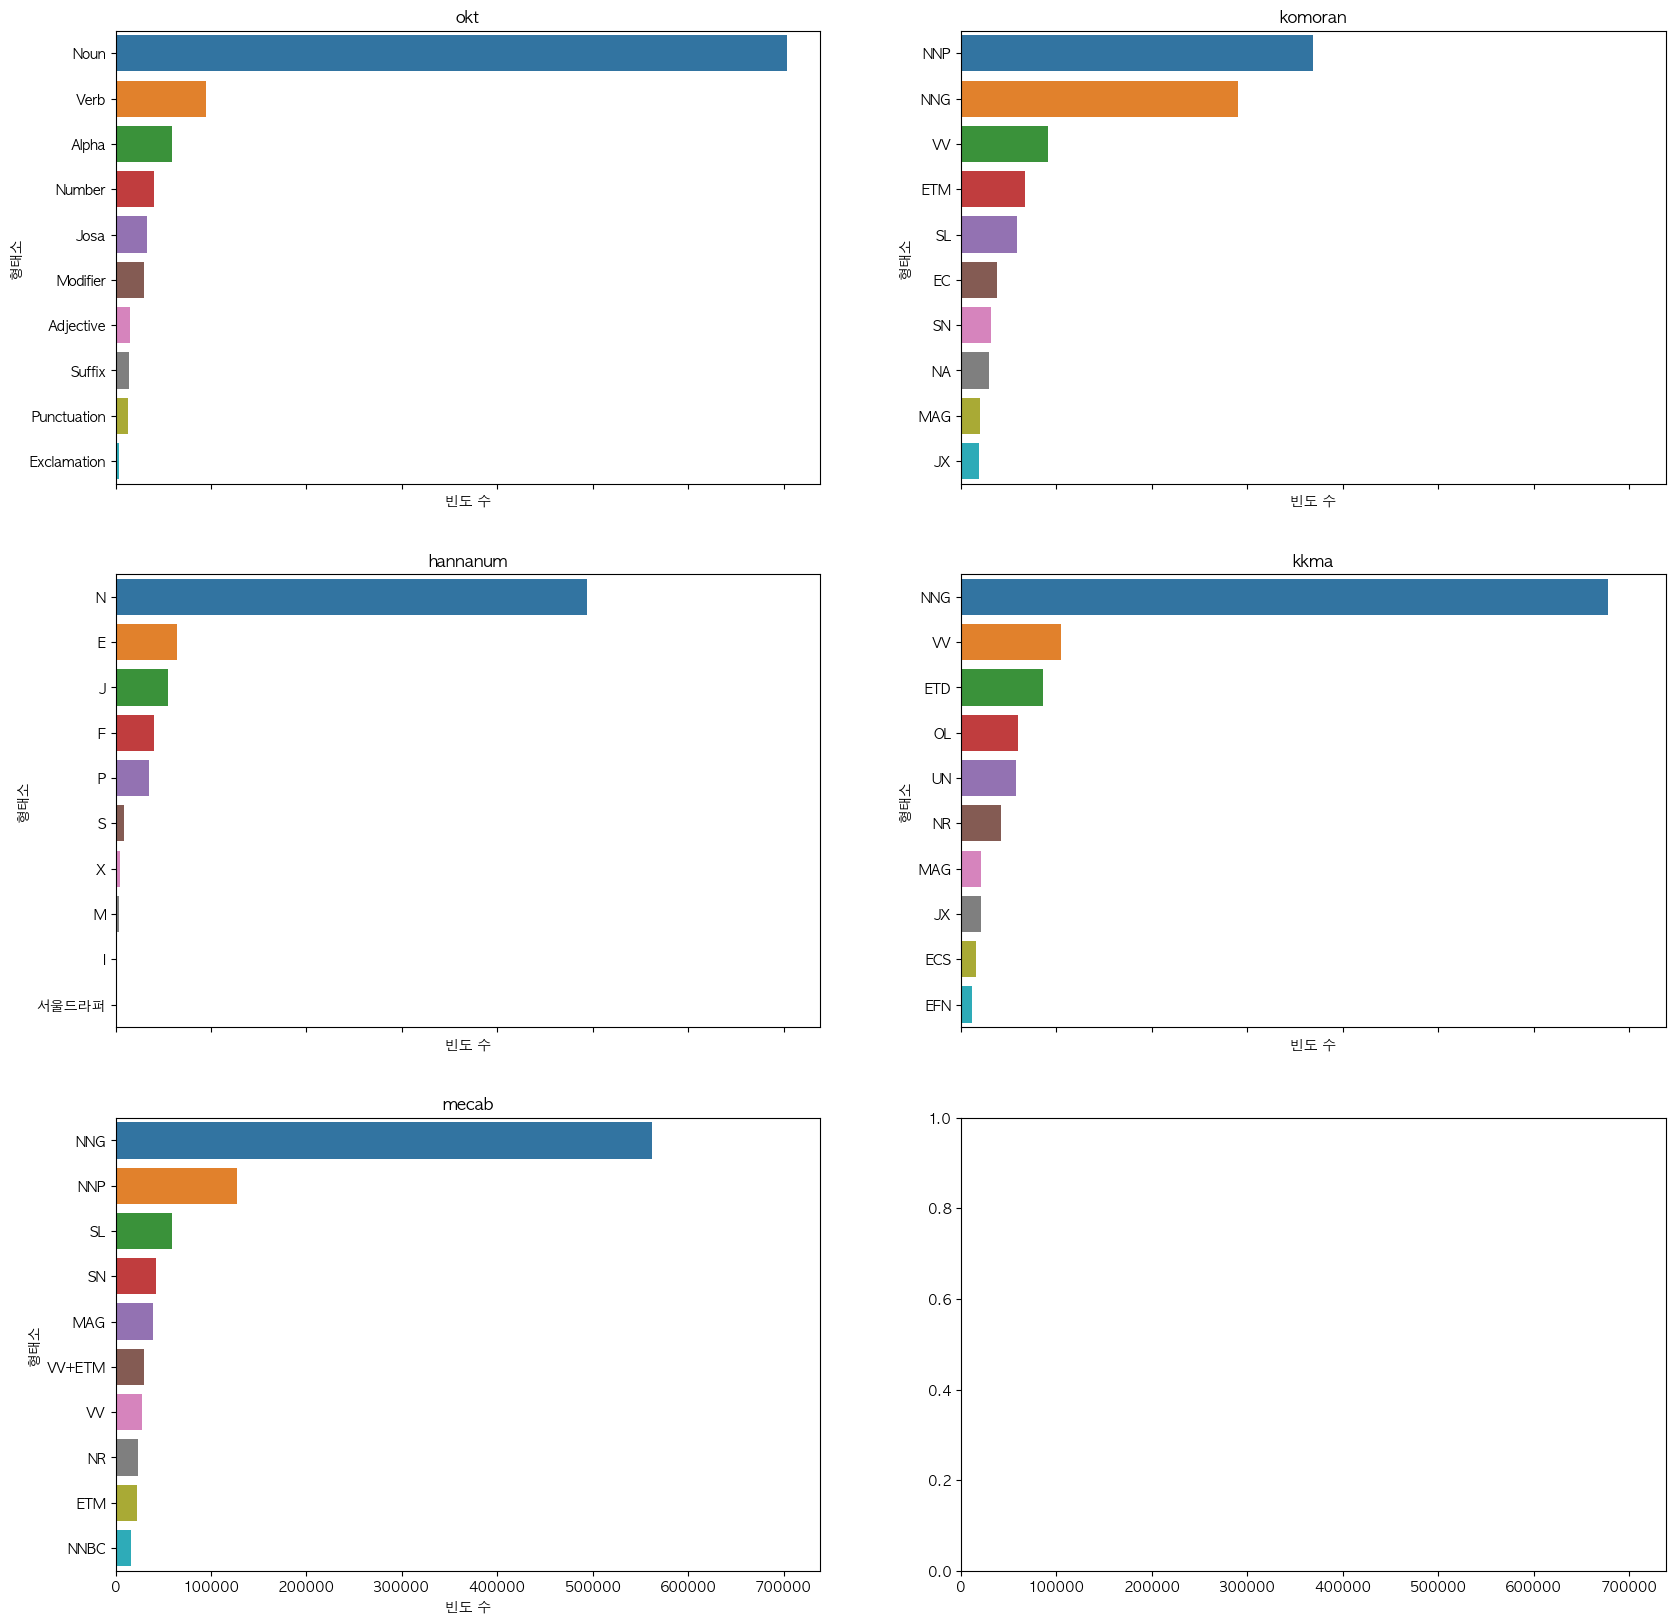

In [20]:
def tag_stat(tokenizer):
    tags = []
    for c in df[tokenizer]:
        for p in c:
            tags.append(p[1])
    counter=Counter(tags)
    return counter


fig = plt.subplots(3,2, figsize=(20,20), sharex=True)


plt.subplot(321)
x, y = list(map(list, zip(*tag_stat('okt').most_common(10))))
ax = sns.barplot(x=y, y=x)
ax.set_title("okt")
ax.set(xlabel='빈도 수', ylabel='형태소')


plt.subplot(322)
x, y = list(map(list, zip(*tag_stat('komoran').most_common(10))))
ax = sns.barplot(x=y, y=x)
ax.set_title("komoran")
ax.set(xlabel='빈도 수', ylabel='형태소')


plt.subplot(323)
x, y = list(map(list, zip(*tag_stat('hannanum').most_common(10))))
ax = sns.barplot(x=y, y=x)
ax.set_title("hannanum")
ax.set(xlabel='빈도 수', ylabel='형태소')

plt.subplot(324)
x, y = list(map(list, zip(*tag_stat('kkma').most_common(10))))
ax = sns.barplot(x=y, y=x)
ax.set_title("kkma")
ax.set(xlabel='빈도 수', ylabel='형태소')

plt.subplot(325)
x, y = list(map(list, zip(*tag_stat('mecab').most_common(10))))
ax = sns.barplot(x=y, y=x)
ax.set_title("mecab")
ax.set(xlabel='빈도 수', ylabel='형태소')

# 명사 통계

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '명사')]

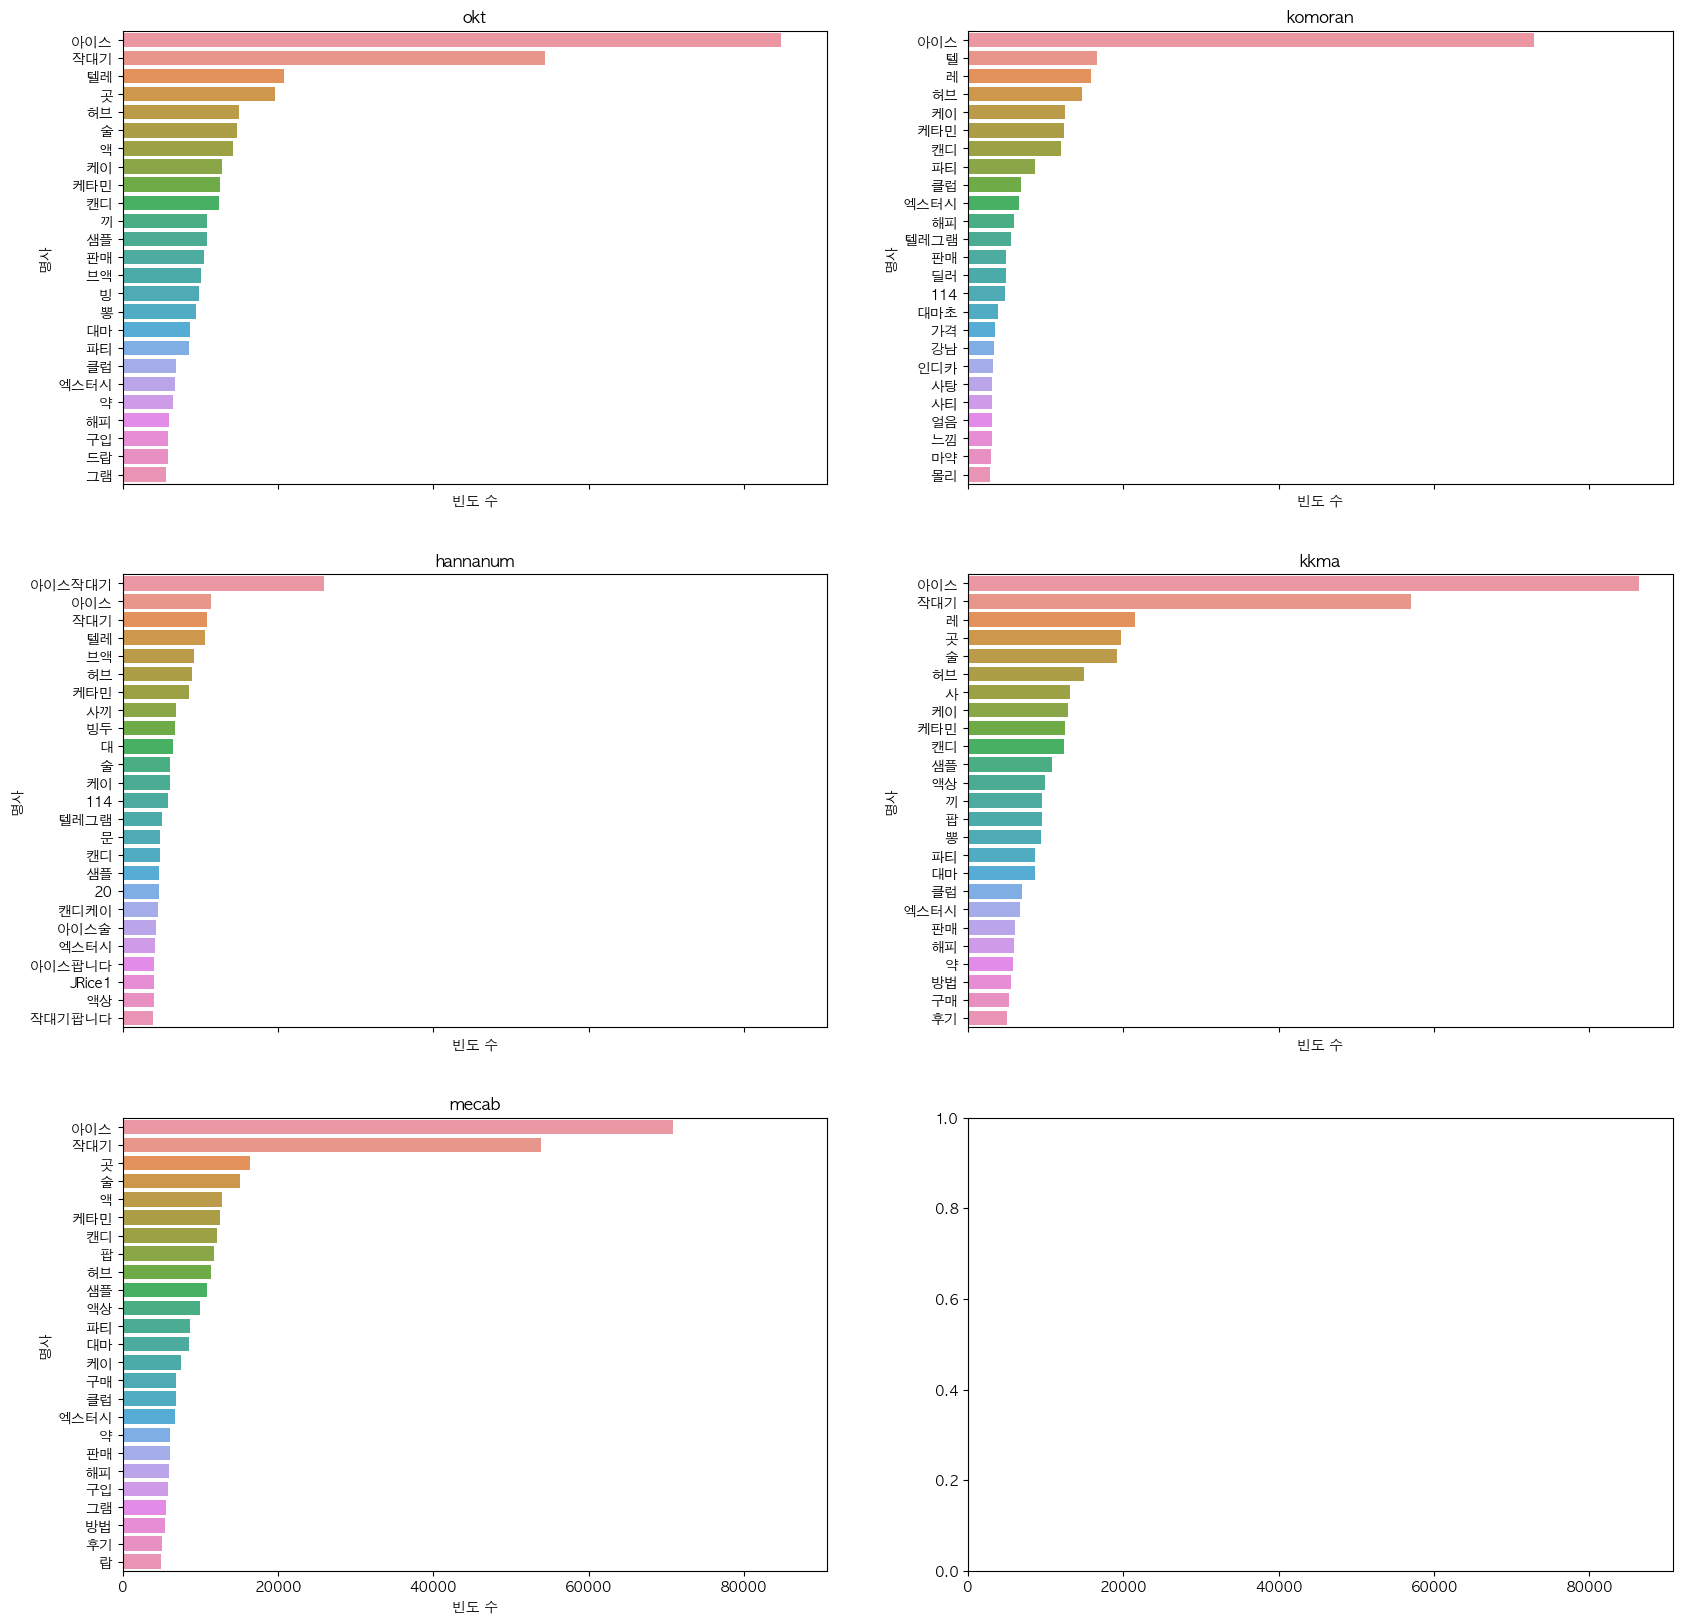

In [24]:
def num_of_noun(tokenizer, noun):
    nouns = []
    for c in df[tokenizer]:
        for p in c:
            if p[1] == noun:
                nouns.append(p[0])
    counter = Counter(nouns)
    return counter


fig = plt.subplots(3,2, figsize=(20,20), sharex=True)

plt.subplot(321)
x, y = list(map(list, zip(*num_of_noun('okt', 'Noun').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("okt")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(322)
x, y = list(map(list, zip(*num_of_noun('komoran', 'NNP').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("komoran")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(323)
x, y = list(map(list, zip(*num_of_noun('hannanum', 'N').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("hannanum")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(324)
x, y = list(map(list, zip(*num_of_noun('kkma', 'NNG').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("kkma")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(325)
x, y = list(map(list, zip(*num_of_noun('mecab', 'NNG').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("mecab")
ax.set(xlabel='빈도 수', ylabel='명사')

# 두 글자 이상 명사 통계 (검색한 키워드를 제외)

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '명사')]

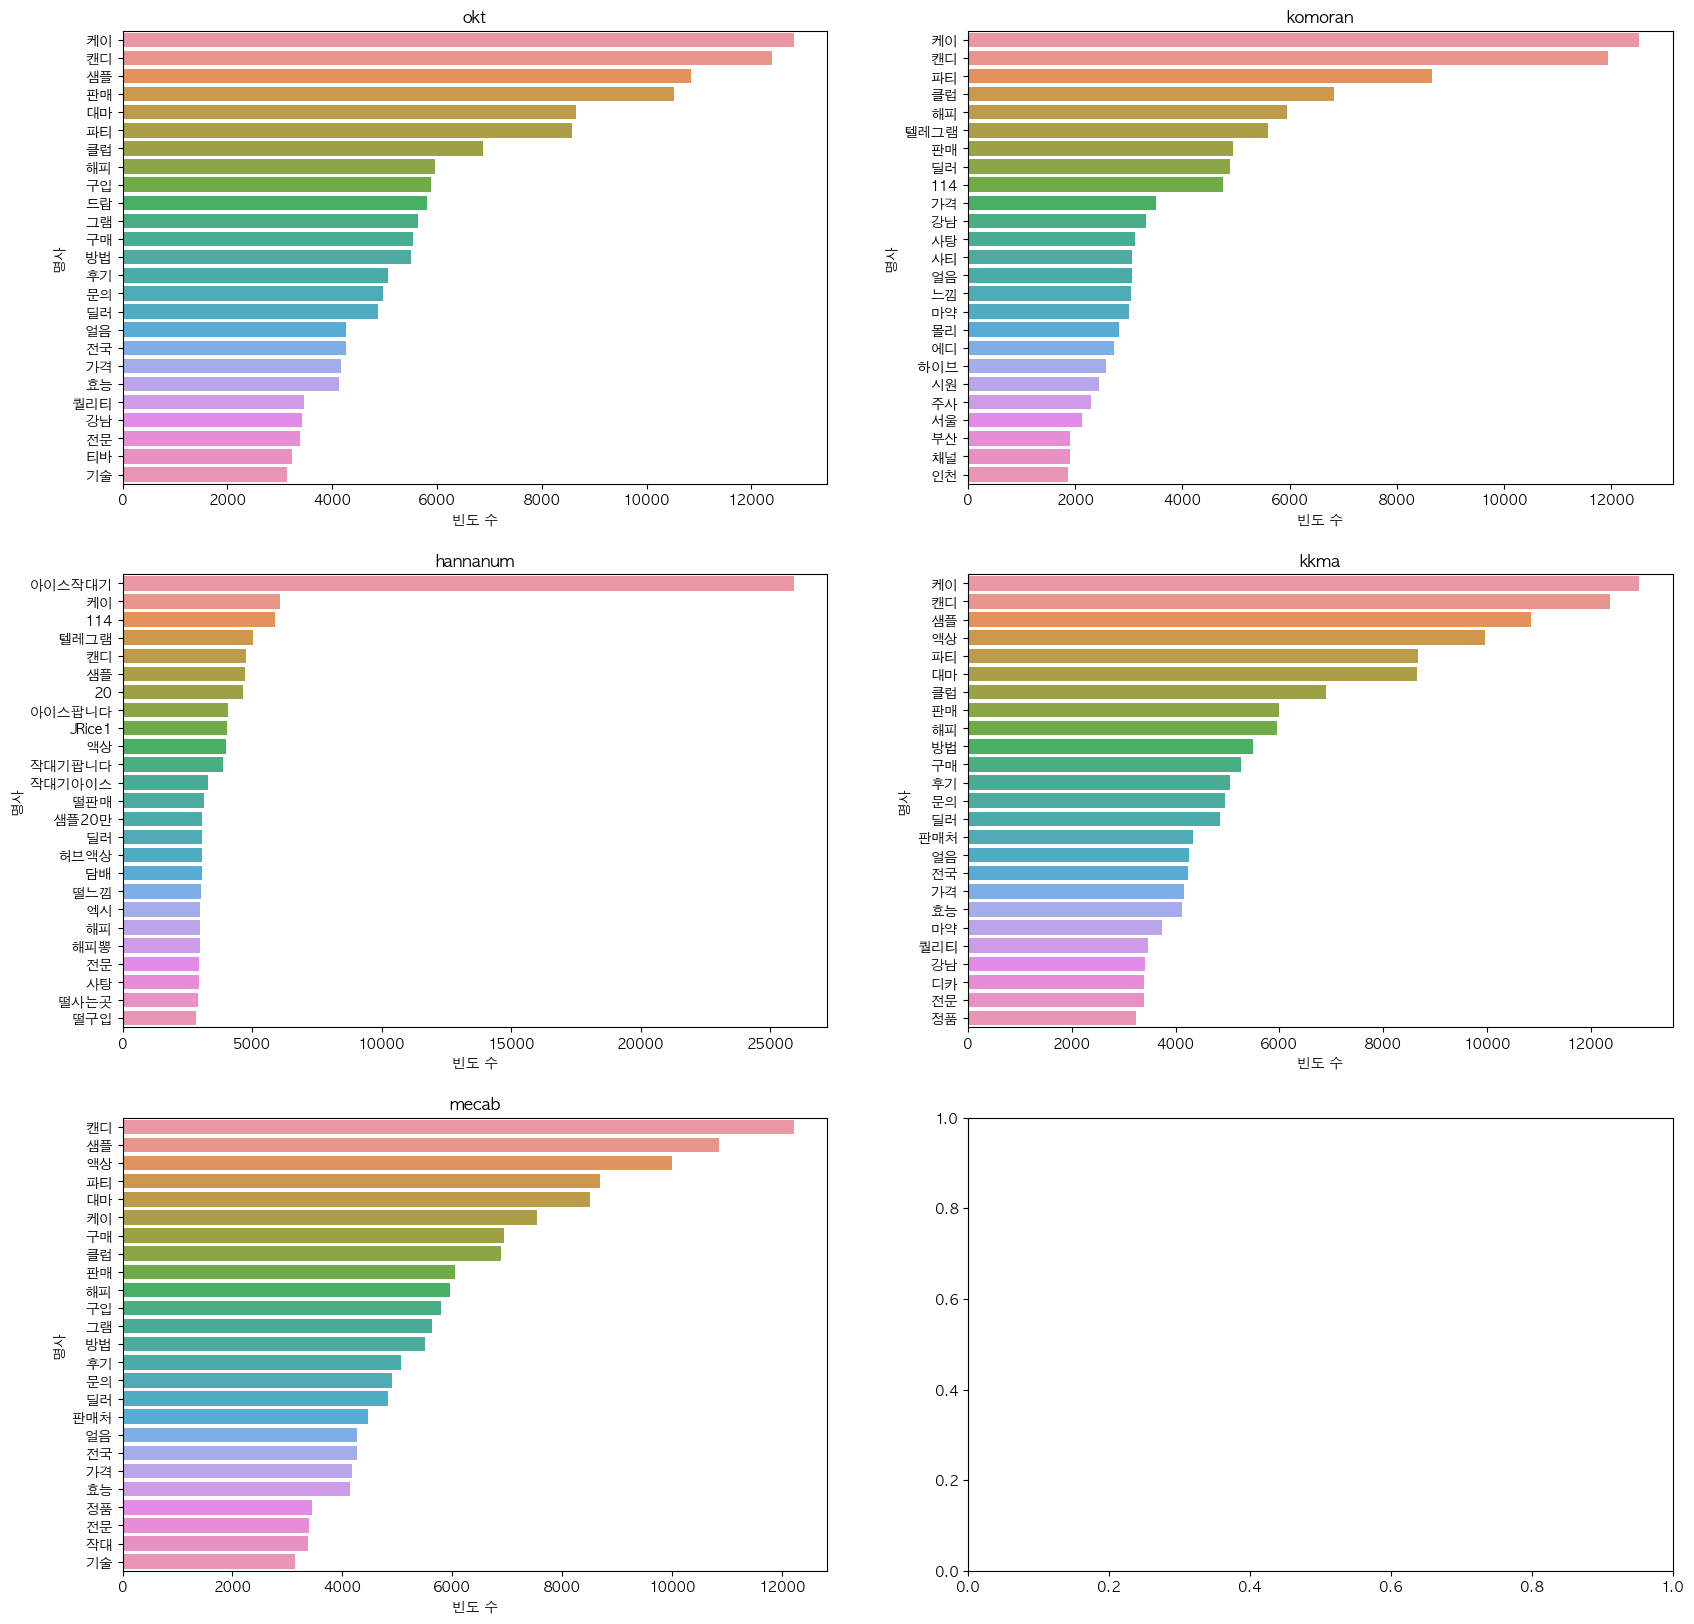

In [27]:
keywords = ['스틸녹스', '신의눈물', '에토미데이트', '옥시코돈', '졸피뎀', '트라마돌', '캔디케이', '케타민', '러쉬파퍼', '랏슈', '정글주스', '엘에스디', '엑스터시', '마법의버섯', '환각버섯', '떨액', '북한산아이스', '빙두', '삥두', '사끼', '샤부', '시원한술', '아이스술', '액상떨', '작대기', '히로뽕', '크리스탈', '차가운술', '아이스', '찬술', '드라퍼', '브액', '아이스드랍', '클럽약', '텔레', '파티약', '패치', '후리베이스', '주사기', '허브', '물뽕', '발정제', '최음제', '사티바', '인디카', '합성대마', '해시시', '대마초']

def num_of_noun(tokenizer, noun):
    nouns = []
    for c in df[tokenizer]:
        for p in c:
            if p[1] == noun and len(str(p[0])) > 1 and p[0] not in keywords:
                nouns.append(p[0])
    counter = Counter(nouns)
    return counter


fig = plt.subplots(3,2, figsize=(20,20))

plt.subplot(321)
x, y = list(map(list, zip(*num_of_noun('okt', 'Noun').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("okt")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(322)
x, y = list(map(list, zip(*num_of_noun('komoran', 'NNP').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("komoran")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(323)
x, y = list(map(list, zip(*num_of_noun('hannanum', 'N').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("hannanum")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(324)
x, y = list(map(list, zip(*num_of_noun('kkma', 'NNG').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("kkma")
ax.set(xlabel='빈도 수', ylabel='명사')

plt.subplot(325)
x, y = list(map(list, zip(*num_of_noun('mecab', 'NNG').most_common(25))))
ax = sns.barplot(x=y, y=x)
ax.set_title("mecab")
ax.set(xlabel='빈도 수', ylabel='명사')